# Toronto Cafe Opening

### Description

In Toronto a well known worldwide firm of cafes is looking to open a cafe. The kind of investigation they need is to select a neighbourhood that has not many cafes, but instead has a lot of other venues, like museums, universities, restaurants etc. 

The idea is to investigate the neighbourhoods of Toronto and to sort them according to the desired ratio of number of venus/number of cafes.

The neighbourhood with the highest ratio will be the candidate neighbourhood. This is the simpler approach and the model can be further enriched to include if available demographic data and rent costs.

For the venues investigation the Foursquare database is going to be utilized by its respective API.

The queried venues will include every kind of venue and cafes will be treated separately. 


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from matplotlib.ticker import StrMethodFormatter

In [5]:
!pip install lxml

     |████████████████████████████████| 5.5MB 17.8MB/s eta 0:00:01


In [6]:
import lxml

In [7]:
!pip install geopy

     |████████████████████████████████| 112kB 8.3MB/s eta 0:00:01


In [8]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Now I scrape the Wikipedia page containing neighourhoods of Toronto 

In [9]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [10]:
df = dfs[0]

In [11]:
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### I remove records with not assigned Borough

In [12]:
df = df[df.Borough != 'Not assigned']

In [13]:
df.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


### I join Neighbourhoods with the same Postal Code

In [14]:
df = df.groupby('Postal Code').agg({'Borough':'first', 'Neighbourhood': ', '.join }).reset_index()

In [15]:
df

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


### Finally if neighbourhood is Not assigned I give it the name of the Borough

In [16]:
df['Neighbourhood'] = np.where(df['Neighbourhood'] == 'Not assigned', df['Borough'], df['Neighbourhood'])

In [17]:
df.head()

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


### I provide the required shape call to the prepared dataframe

In [18]:
df.shape

(103, 3)

### Now the first submission for the assignment is completed

### Now I read the csv with the locations

In [19]:
dfloc = pd.read_csv('http://cocl.us/Geospatial_data')

In [20]:
dfloc.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [21]:
dffinal = pd.merge(df, dfloc, on='Postal Code')

In [22]:
dffinal.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### Now we find the central location of Toronto

In [23]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 43.6534817, -79.3839347.


### Now we keep only the Toronto data

In [24]:
toronto_data = dffinal[dffinal['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto_data

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


### Create Map of Toronto

In [25]:
# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Use of Foursquare API

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [26]:
CLIENT_ID = 'L0VGYNB4SBA1333BWSKD3ETF2M2N2JXGIPMDFVWBHFXTKYC1' # your Foursquare ID
CLIENT_SECRET = 'WPLRISTJ5RP1XEKEJMEQ2KGUNCPDKESJOUBTBJRJUOCMRWZ2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: L0VGYNB4SBA1333BWSKD3ETF2M2N2JXGIPMDFVWBHFXTKYC1
CLIENT_SECRET:WPLRISTJ5RP1XEKEJMEQ2KGUNCPDKESJOUBTBJRJUOCMRWZ2


### Explore Neighbourhoods in Toronto

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}\
        &v={}&ll={},{}&radius={}&limit={}&categoryId='.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High 

In [30]:
print(toronto_venues.shape)
toronto_venues.head()

(1624, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [33]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Berczy Park,55,55,55,55,55,55
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,68,68,68,68,68,68
Christie,16,16,16,16,16,16
Church and Wellesley,75,75,75,75,75,75
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,33,33,33,33,33,33


In [34]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 237 uniques categories.


### Analyze each Neighbourhood

In [35]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] =toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').sum()
toronto_grouped

,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
Neighbourhood,,,,,,,,,,,,,,,,,,,,,
Berczy Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
"Brockton, Parkdale Village, Exhibition Place",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",0,1,1,1,2,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Central Bay Street,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
Christie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Church and Wellesley,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,2
"Commerce Court, Victoria Hotel",0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,2,0,0,1,0,0
Davisville,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
toronto_grouped.shape

(39, 237)

In [39]:
kinds = list(toronto_grouped.columns.values) 

In [40]:
kinds

['Afghan Restaurant',
 'Airport',
 'Airport Food Court',
 'Airport Gate',
 'Airport Lounge',
 'Airport Service',
 'Airport Terminal',
 'American Restaurant',
 'Antique Shop',
 'Aquarium',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Workshop',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Stadium',
 'Basketball Stadium',
 'Beach',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Store',
 'Belgian Restaurant',
 'Bistro',
 'Boat or Ferry',
 'Bookstore',
 'Boutique',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Butcher',
 'Café',
 'Cajun / Creole Restaurant',
 'Camera Store',
 'Candy Store',
 'Caribbean Restaurant',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Church',
 'Climbing Gym',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'College Arts Building',
 'College Auditorium',
 'College

In [41]:
toronto_grouped['sum'] = toronto_grouped[list(toronto_grouped.columns)].sum(axis=1)

In [43]:
toronto_grouped['sum']

Neighbourhood
Berczy Park                                                                                                    55
Brockton, Parkdale Village, Exhibition Place                                                                   23
Business reply mail Processing Centre, South Central Letter Processing Plant Toronto                           16
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport     16
Central Bay Street                                                                                             68
Christie                                                                                                       16
Church and Wellesley                                                                                           75
Commerce Court, Victoria Hotel                                                                                100
Davisville                                                                

In [44]:
toronto_grouped['Café'] = toronto_grouped['Café']+1

In [45]:
toronto_grouped['Ratio'] = toronto_grouped['sum']/toronto_grouped['Café']

In [46]:
final = toronto_grouped[['sum', 'Café','Ratio']]

In [47]:
final

,sum,Café,Ratio
Neighbourhood,,,
Berczy Park,55,2,27.500000
"Brockton, Parkdale Village, Exhibition Place",23,4,5.750000
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,1,16.000000
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,1,16.000000
Central Bay Street,68,5,13.600000
Christie,16,4,4.000000
Church and Wellesley,75,3,25.000000
"Commerce Court, Victoria Hotel",100,7,14.285714
Davisville,33,3,11.000000


In [48]:
final.sort_values(['Ratio','sum'], ascending=False)

,sum,Café,Ratio
Neighbourhood,,,
Berczy Park,55,2,27.500000
Church and Wellesley,75,3,25.000000
Stn A PO Boxes,96,4,24.000000
"The Danforth West, Riverdale",43,2,21.500000
"Garden District, Ryerson",100,5,20.000000
"Harbourfront East, Union Station, Toronto Islands",100,5,20.000000
"India Bazaar, The Beaches West",19,1,19.000000
"Richmond, Adelaide, King",100,6,16.666667
"Toronto Dominion Centre, Design Exchange",100,6,16.666667


A simple horizontal bar plot

<AxesSubplot:ylabel='Neighbourhood'>

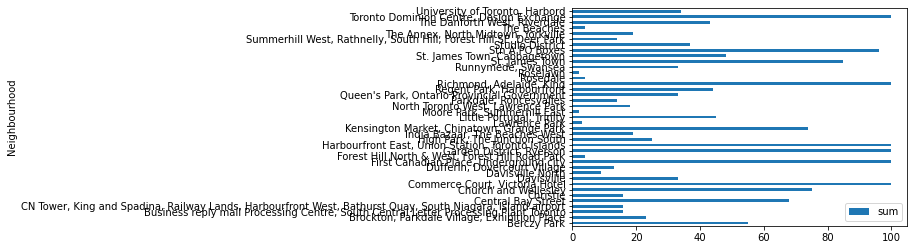

In [49]:
final[['sum']].plot(kind="barh")

A more customized bar plot

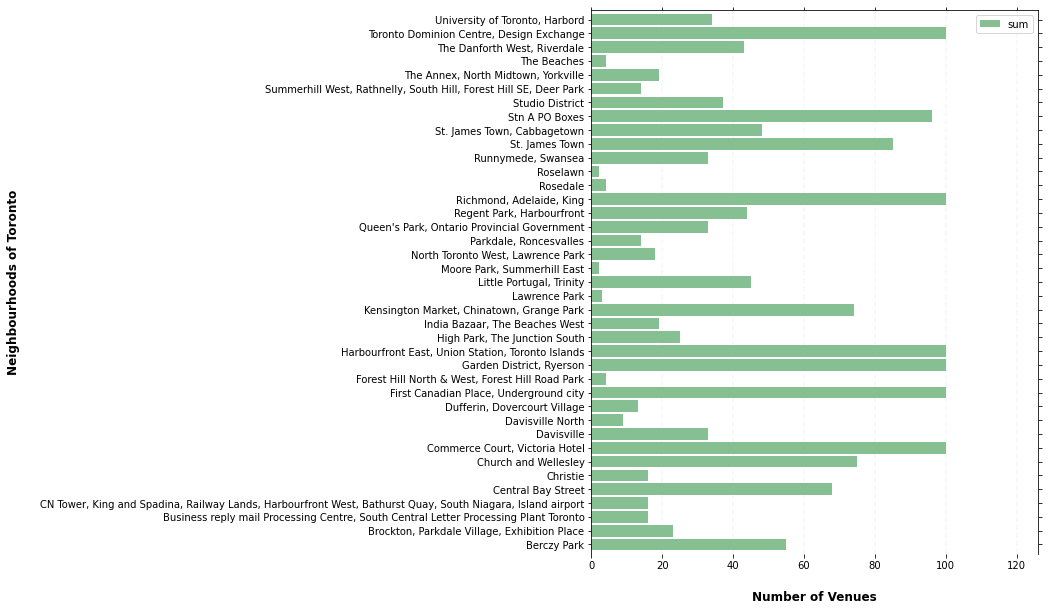

In [50]:
ax = final[['sum']].plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
  ax.set_xlabel("Number of Venues", labelpad=20, weight='bold', size=12)

  # Set y-axis label
  ax.set_ylabel("Neighbourhoods of Toronto", labelpad=20, weight='bold', size=12)

  # Format y-axis label
  ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#fig = plt.gcf()
#fig.savefig('test1png.png')
plt.savefig('plot1.png',bbox_inches='tight',dpi=300)

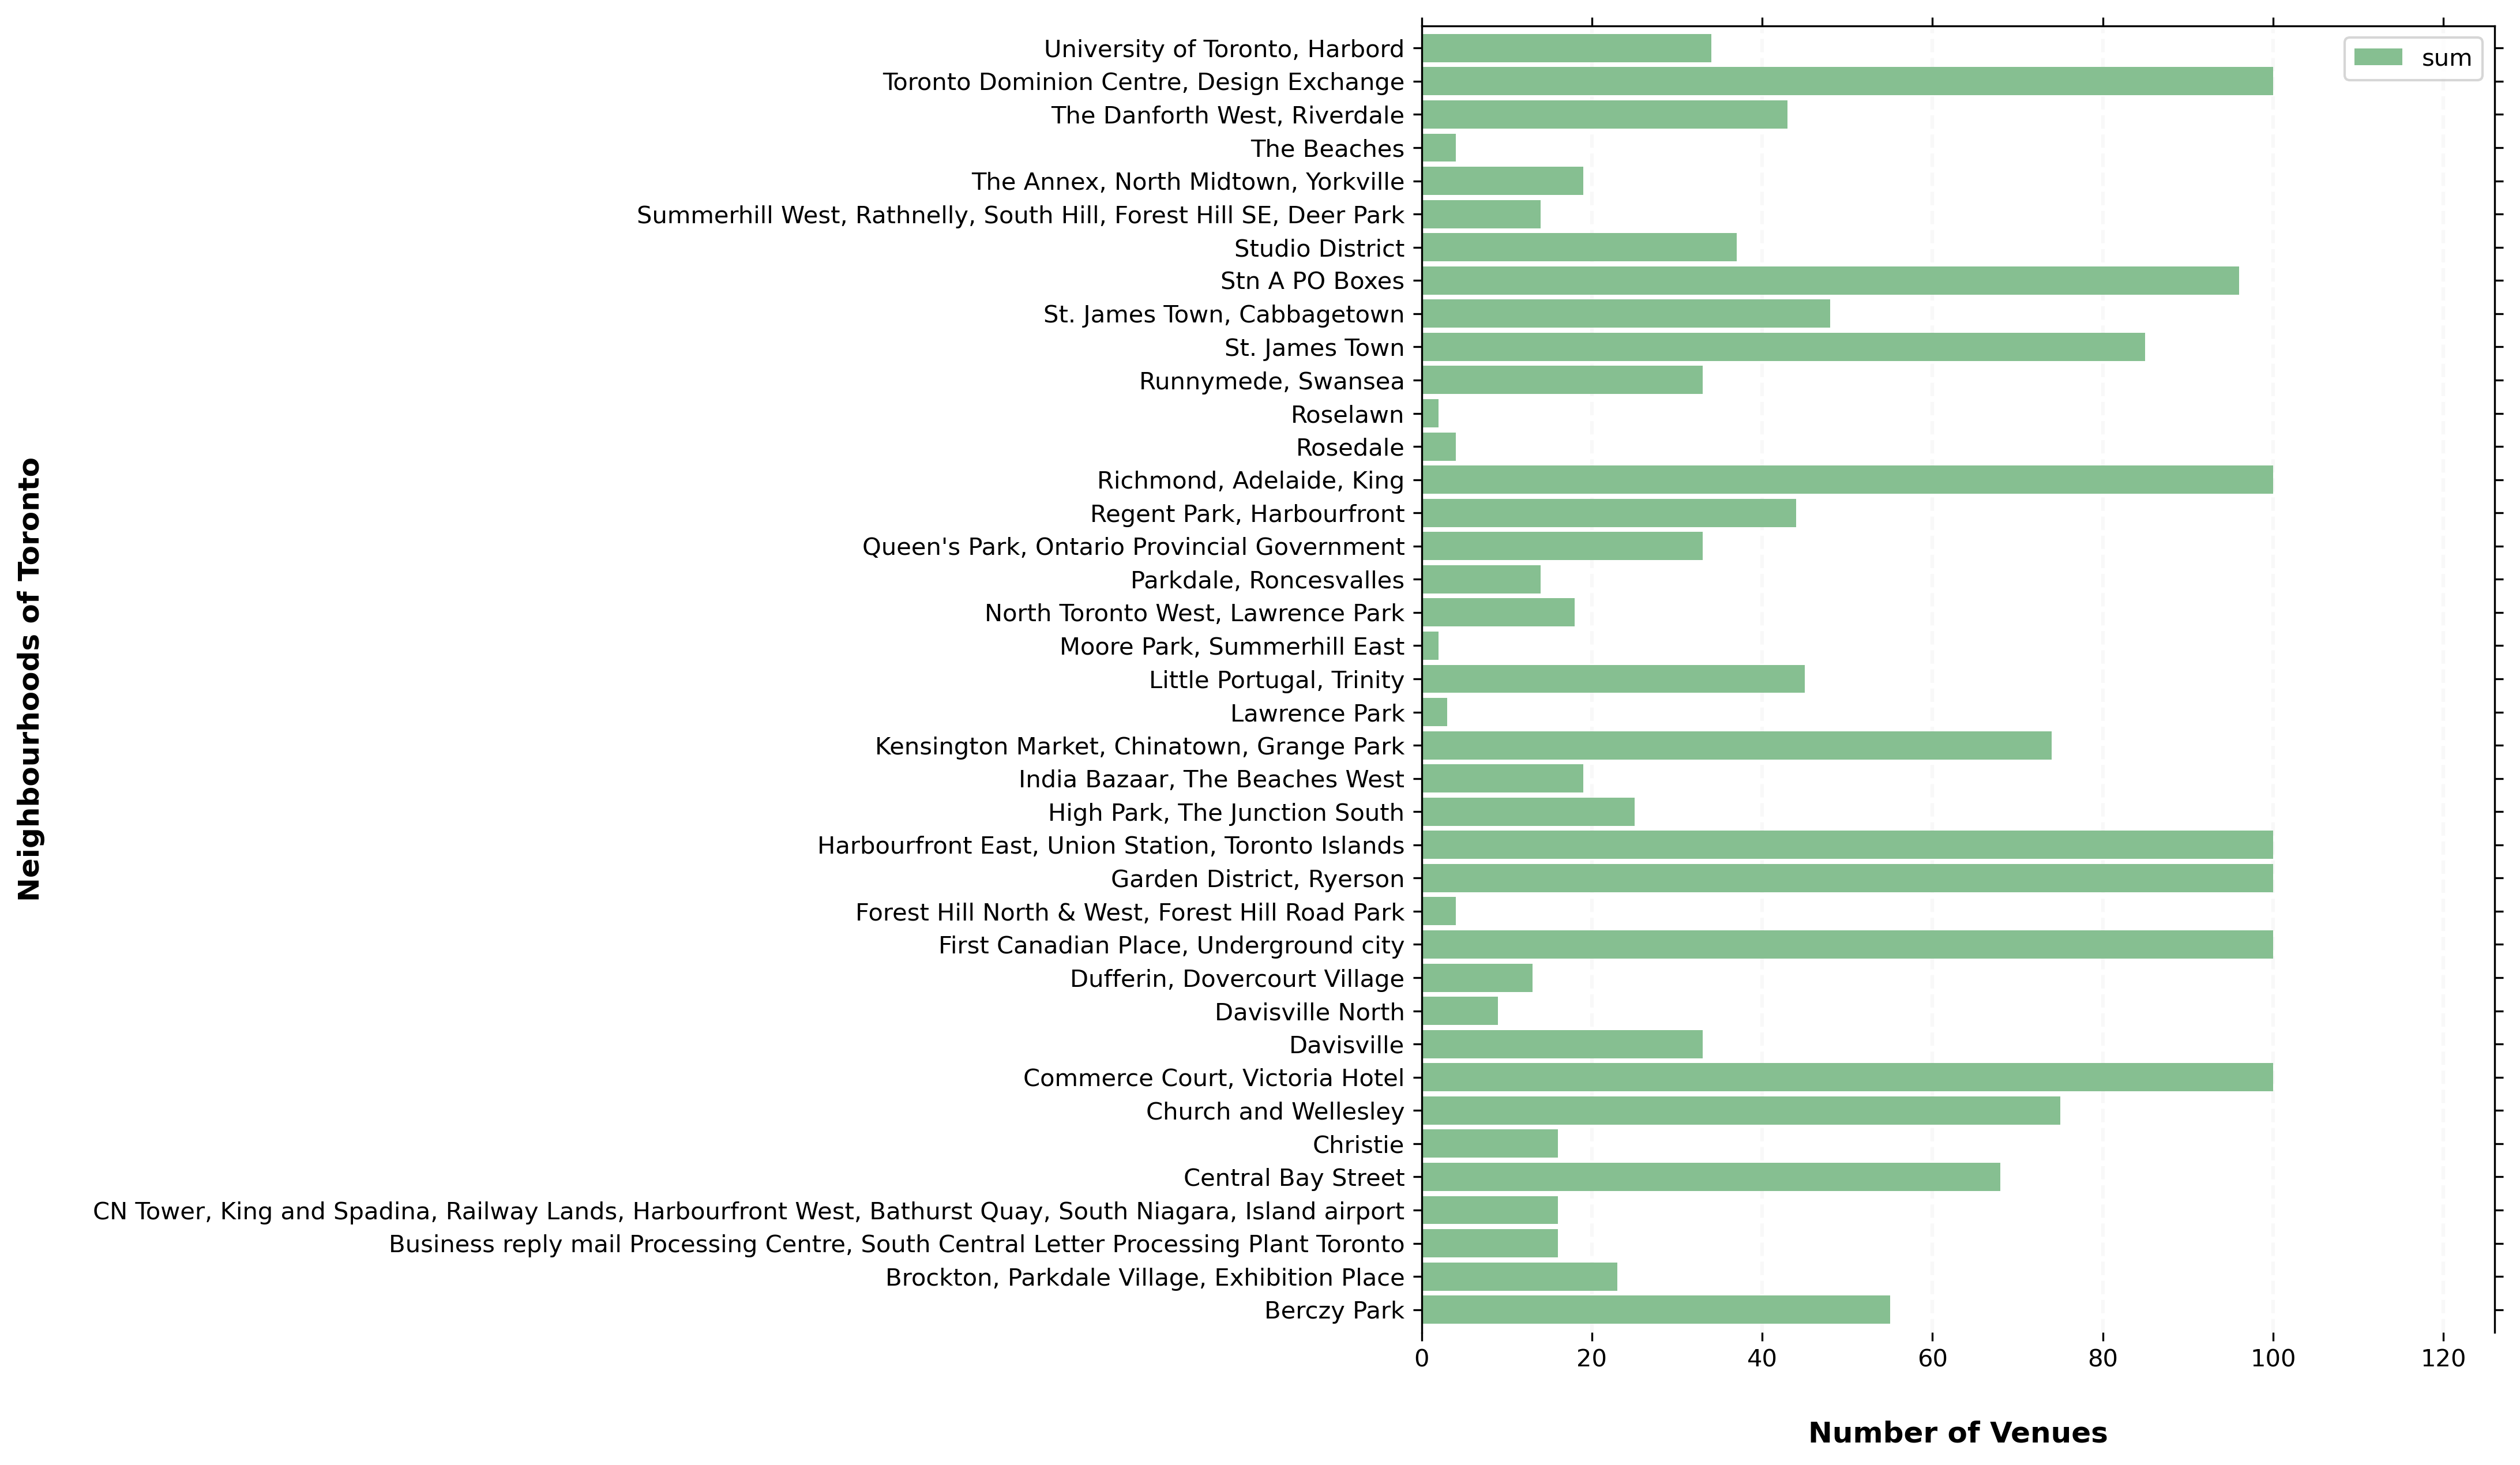

In [51]:
from IPython.display import Image
Image(filename='plot1.png')

Make the index as a column with reset

In [52]:
finalcopy = final.reset_index()

In [53]:
finalcopy

,Neighbourhood,sum,Café,Ratio
0,Berczy Park,55,2,27.500000
1,"Brockton, Parkdale Village, Exhibition Place",23,4,5.750000
2,"Business reply mail Processing Centre, South C...",16,1,16.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",16,1,16.000000
4,Central Bay Street,68,5,13.600000
5,Christie,16,4,4.000000
6,Church and Wellesley,75,3,25.000000
7,"Commerce Court, Victoria Hotel",100,7,14.285714
8,Davisville,33,3,11.000000
9,Davisville North,9,1,9.000000


A customized plot by using lists of column values of the dataframe

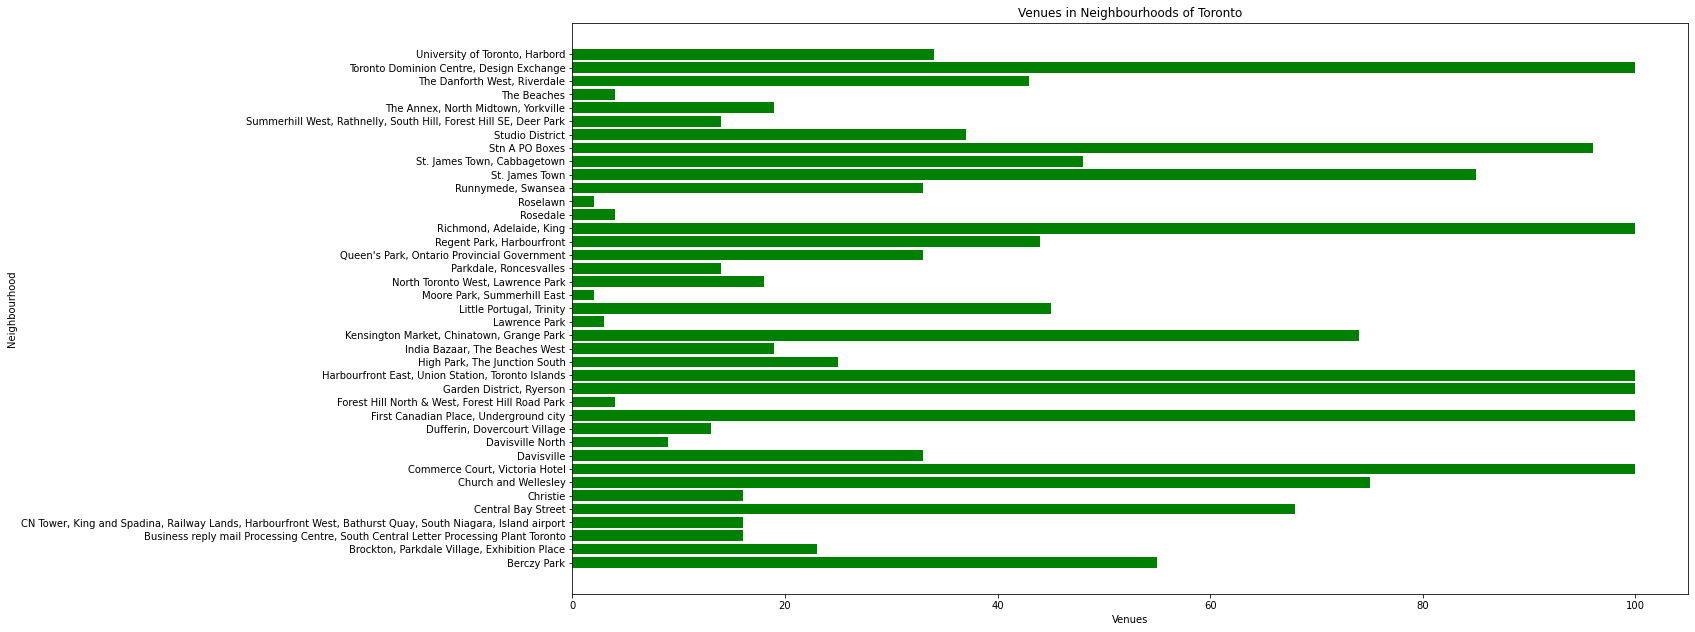

In [54]:
x = finalcopy['Neighbourhood'].tolist()
sumvenues = finalcopy['sum'].tolist()

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, sumvenues, color='green')
plt.ylabel("Neighbourhood")
plt.xlabel("Venues")
plt.title("Venues in Neighbourhoods of Toronto")

plt.yticks(x_pos, x)

fig = plt.gcf()
fig.set_size_inches(20, 10.5)
fig.savefig('plot2.png', bbox_inches='tight',dpi=100)

plt.show()

Display a saved image

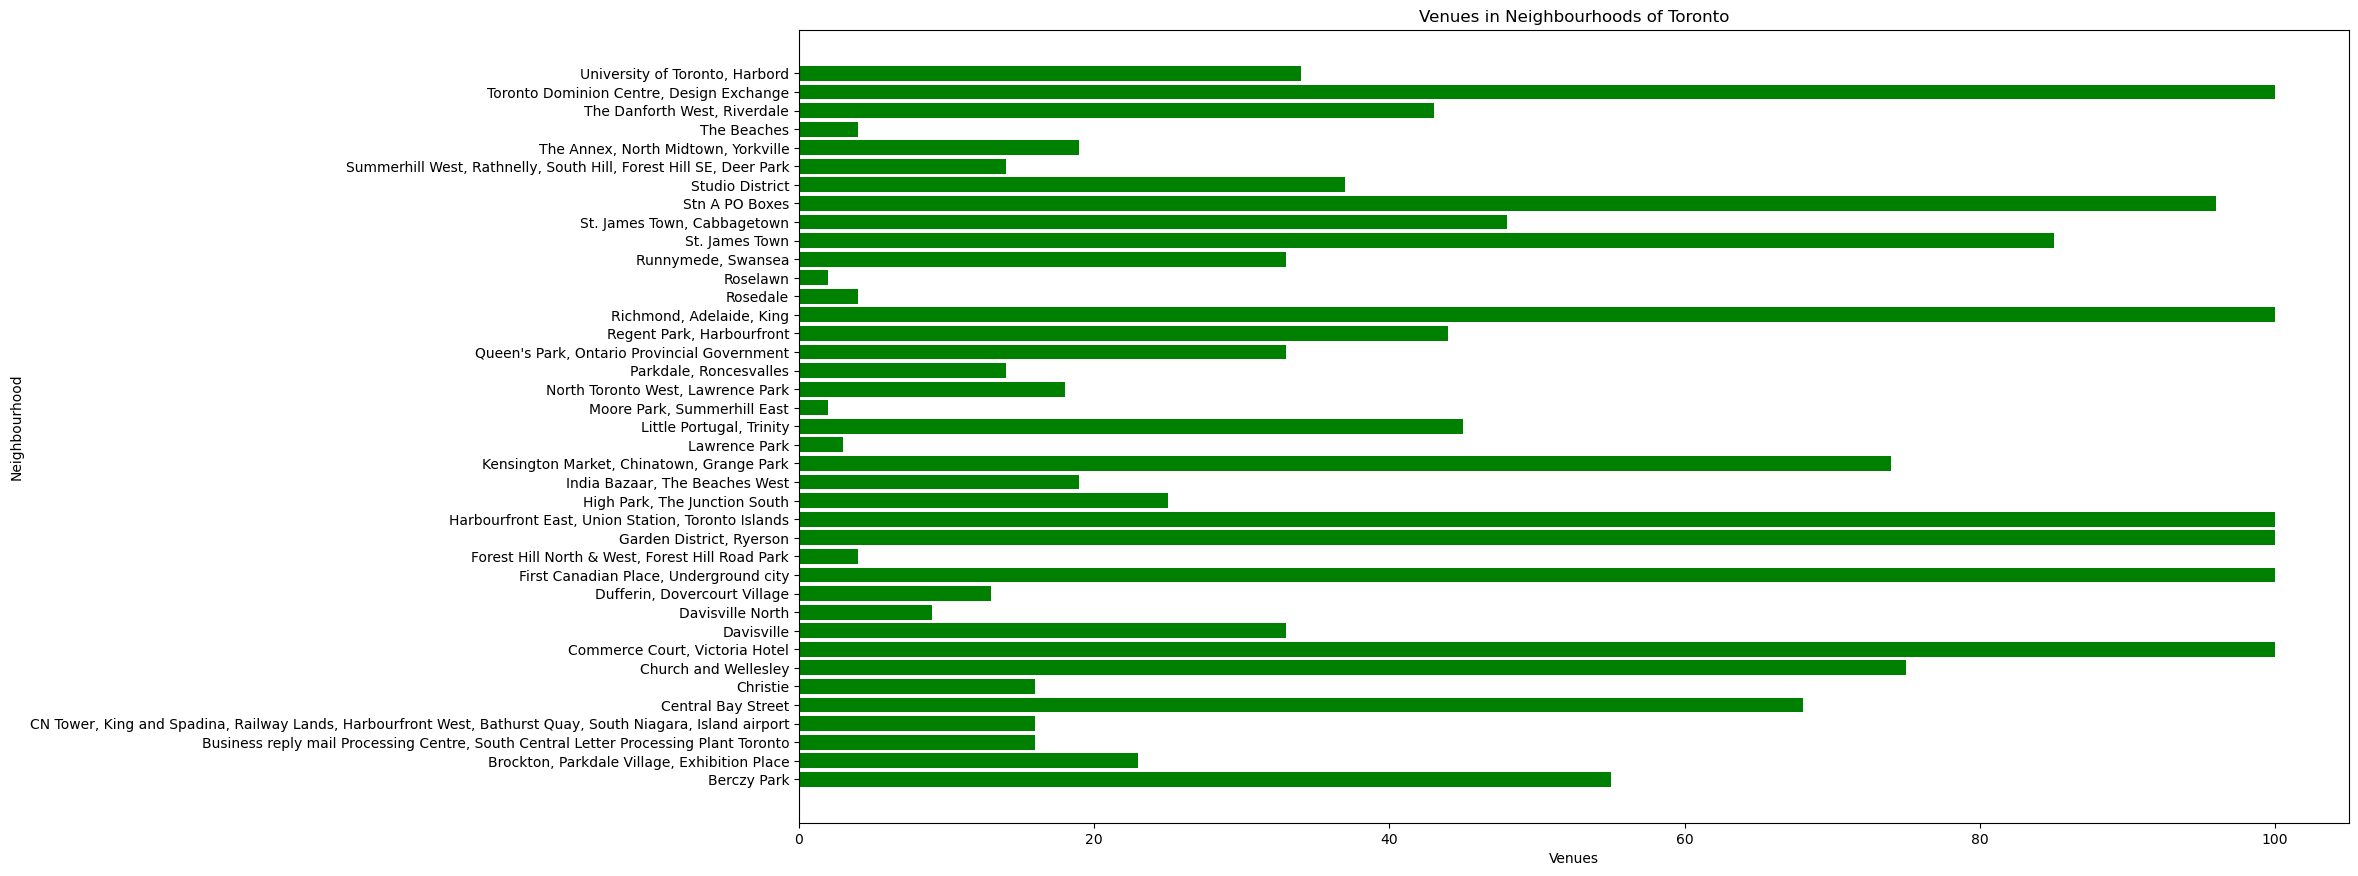

In [55]:
from IPython.display import Image
Image(filename='plot2.png') 

Conbined Plots

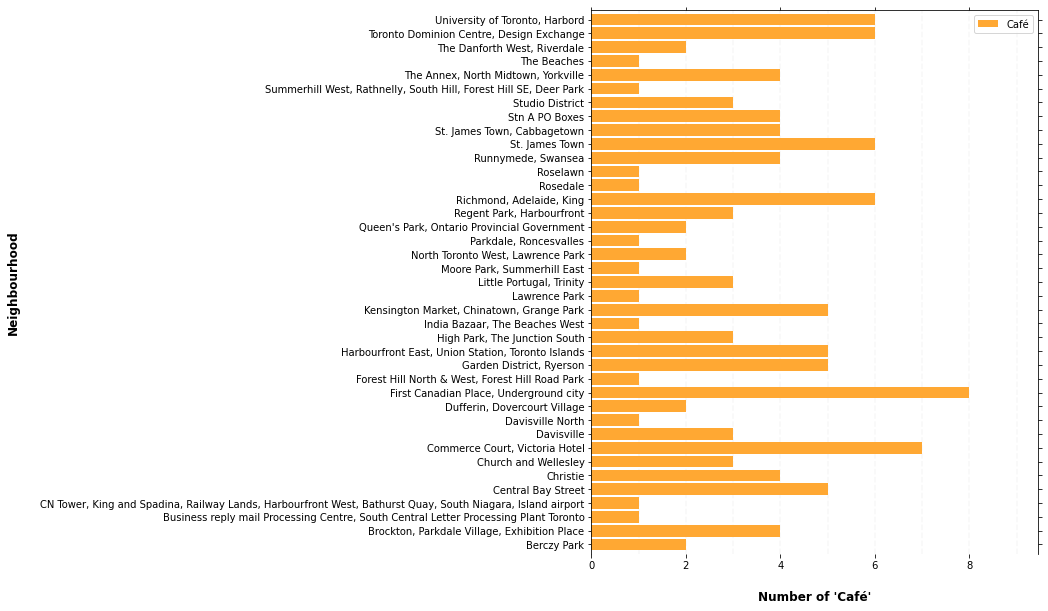

In [56]:
ax = final[['Café']].plot(kind='barh', figsize=(8, 10), color='#FFA833', zorder=2, width=0.85)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
  ax.set_xlabel("Number of 'Café'", labelpad=20, weight='bold', size=12)

  # Set y-axis label
  ax.set_ylabel("Neighbourhood", labelpad=20, weight='bold', size=12)

  # Format y-axis label
  ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#fig = plt.gcf()
#fig.savefig('test1png.png')
plt.savefig('plot3.png',bbox_inches='tight',dpi=300)

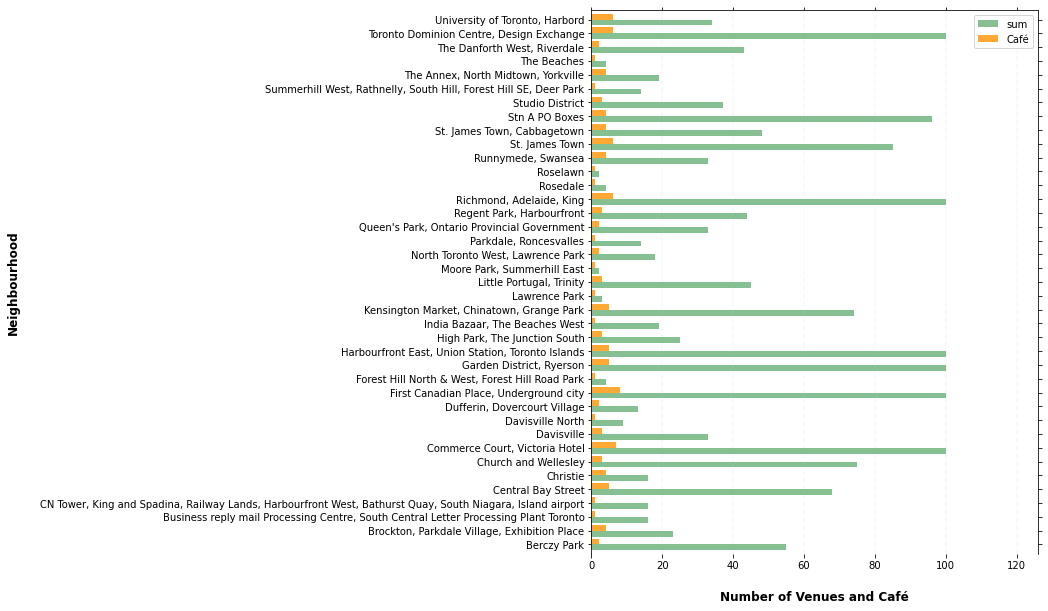

In [57]:
ax = final[['sum','Café']].plot(kind='barh', figsize=(8, 10), color=['#86bf91','#FFA833'], zorder=2, width=0.85)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
  ax.set_xlabel("Number of Venues and Café", labelpad=20, weight='bold', size=12)

  # Set y-axis label
  ax.set_ylabel("Neighbourhood", labelpad=20, weight='bold', size=12)

  # Format y-axis label
  ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#fig = plt.gcf()
#fig.savefig('test1png.png')
plt.savefig('plot4.png',bbox_inches='tight',dpi=300)

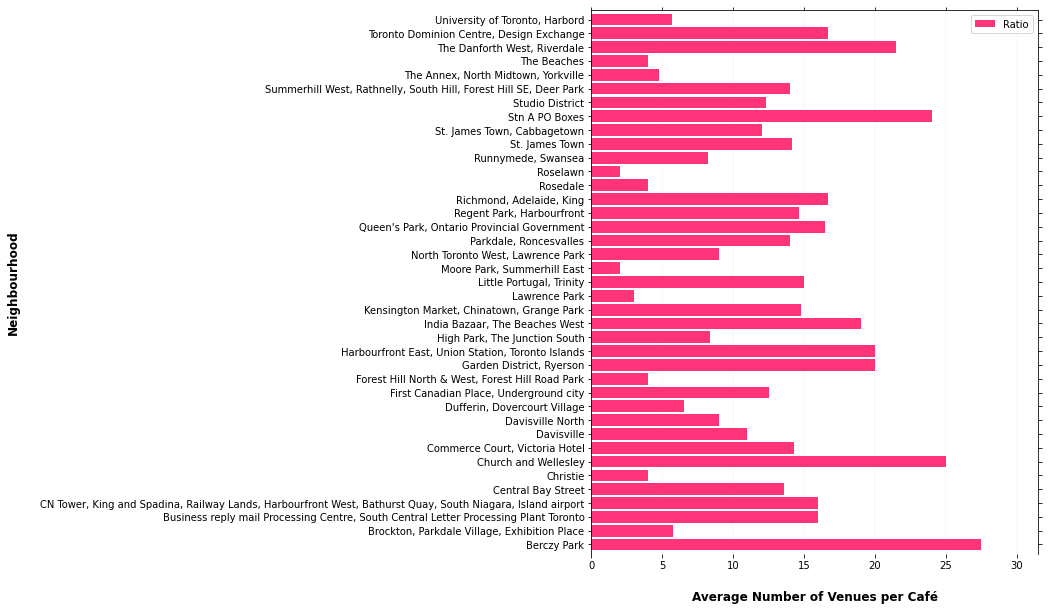

In [58]:
ax = final[['Ratio']].plot(kind='barh', figsize=(8, 10), color='#FF337A', zorder=2, width=0.85)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
  ax.set_xlabel("Average Number of Venues per Café", labelpad=20, weight='bold', size=12)

  # Set y-axis label
  ax.set_ylabel("Neighbourhood", labelpad=20, weight='bold', size=12)

  # Format y-axis label
  ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#fig = plt.gcf()
#fig.savefig('test1png.png')
plt.savefig('plot5.png',bbox_inches='tight',dpi=300)